In [1]:
import pydynverse as pdv

logger = pdv.logger
logger.setLevel("DEBUG")


  _____       _____                                     
 |  __ \     |  __ \                                    
 | |__) |   _| |  | |_   _ _ ____   _____ _ __ ___  ___ 
 |  ___/ | | | |  | | | | | '_ \ \ / / _ \ '__/ __|/ _ \
 | |   | |_| | |__| | |_| | | | \ V /  __/ |  \__ \  __/
 |_|    \__, |_____/ \__, |_| |_|\_/ \___|_|  |___/\___|
         __/ |        __/ |                             
        |___/        |___/         



In [2]:
# 1. 准备数据(wrap)
# 运行R脚本获得数据，为R对象
import rpy2.robjects as ro
from pydynverse.util import rpy2_read # 导入对应的装饰器， 实现数据自动转换
r_script = """
library(dyno)
data("fibroblast_reprogramming_treutlein")
fibroblast_reprogramming_treutlein
"""
fibroblast_reprogramming_treutlein = ro.r(r_script)

# 封装数据
dataset = pdv.wrap.wrap_expression(
    counts=fibroblast_reprogramming_treutlein["counts"],
    expression=fibroblast_reprogramming_treutlein["expression"]
)
logger.info(f"AnnData dataset:\n{dataset}")
logger.info("Dataset loading finished")

R[write to console]: 载入需要的程辑包：dynfeature

R[write to console]: 载入需要的程辑包：dynguidelines

R[write to console]: 载入需要的程辑包：dynmethods

R[write to console]: 载入需要的程辑包：dynplot

R[write to console]: 载入需要的程辑包：dynwrap



[2024年12月30日 10时47分08秒] DEBUG    Dataset created: {'id': '20241230_104708__data_wrapper__VjDSEFmxCM',        
                                       'cell_ids': ['1_iN1_C01', '1_iN1_C02', '1_iN1_C03', '1_iN1_C04',            
                                       '1_iN1_C05', '1_iN1_C07', '1_iN1_C08', '1_iN1_C09', '1_iN1_C10',            
                                       '1_iN1_C11', '1_iN1_C12', '1_iN1_C13', '1_iN1_C14', '1_iN1_C15',            
                                       '1_iN1_C16', '1_iN1_C17', '1_iN1_C19', '1_iN1_C20', '1_iN1_C21',            
                                       '1_iN1_C22', '1_iN1_C23', '1_iN1_C25', '1_iN1_C26', '1_iN1_C27',            
                                       '1_iN1_C29', '1_iN1_C30', '1_iN1_C31', '1_iN1_C33', '1_iN1_C34',            
                                       '1_iN1_C35', '1_iN1_C36', '1_iN1_C37', '1_iN1_C38', '1_iN1_C40',            
                                       '1_iN1_C41', '1_iN1_C42', '1_iN1_C43', 

In [3]:
# 2. 选择方法(method)
methods_selected = [pdv.methods.ti_slingshot(), pdv.methods.ti_comp1()]
logger.info(f"Methods {methods_selected} selecting finished")

                        INFO     backend: container                                                                
                        DEBUG    Docker image(dynverse/ti_slingshot:v1.0.3) loaded                                 
[2024年12月30日 10时47分09秒] INFO     backend: container                                                          
                        DEBUG    Docker image(dynverse/ti_comp1:v0.9.9.01) loaded                                  
                        INFO     Methods [{'method': {'id': 'slingshot', 'name': 'Slingshot', 'source': 'tool',    
                                 'platform': 'R', 'license': 'Artistic-2.0', 'url':                                
                                 'https://github.com/kstreet13/slingshot', 'authors': [{'given': 'Kelly', 'family':
                                 'Street', 'email': 'street.kelly@gmail.com', 'github': 'kstreet13'}, {'given':    
                                 'Sandrine', 'family': 'Dudoit', 'email': 'san

In [4]:
# 3. 运行方法(wrap)
model = pdv.wrap.infer_trajectories(dataset, methods_selected) # 此处尝试修改参数
logger.info(f"Methods executing finished, model: {model}")

                        WARNING                                                                                    
                                                                                                                   
                                                        Prior information start_id,end_id is optional, but missing 
                                 from dataset 20241230_104708__data_wrapper__VjDSEFmxCM.                           
                                                                                                                   
                                                        Will not give this prior to method.                        
                                                                                                                   
                        DEBUG    Temp wd: /tmp/tmp1emve3z4                                                         
                        DEBUG    Save json successfully, path: /tmp/tmp1

                        INFO     Coloring by grouping                                                              
                        DEBUG    selecting waypoints                                                               
[2024年12月30日 10时48分05秒] DEBUG    selecting waypoints shape is (690, 392), finished!                          
                        INFO     Result plotting finished                                                          


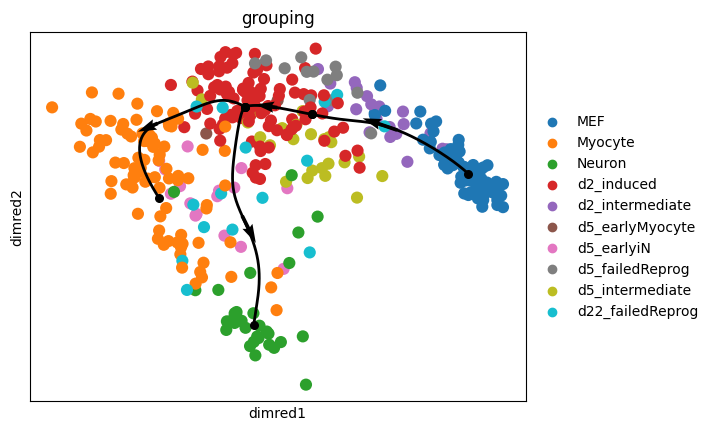

In [5]:
# 4. 绘制轨迹(dimred+plot)
pdv.plot.plot_dimred(model[0]["model"], expression_source=dataset["expression"], grouping=list(fibroblast_reprogramming_treutlein["grouping"]))
logger.info("Result plotting finished")

                        INFO     Coloring by grouping                                                              
                        DEBUG    selecting waypoints                                                               
[2024年12月30日 10时48分15秒] DEBUG    selecting waypoints shape is (201, 392), finished!                          


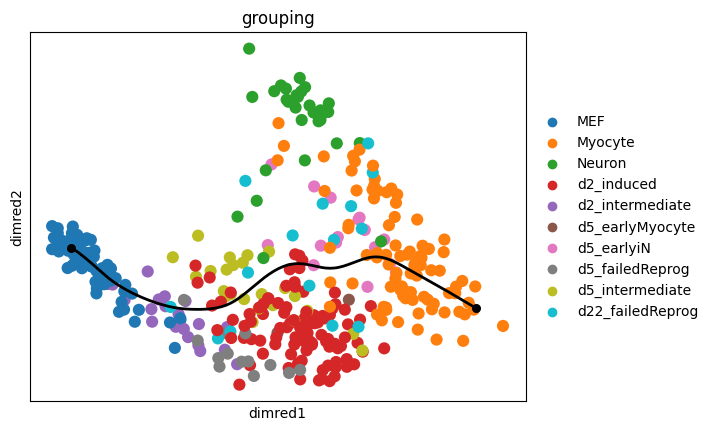

In [6]:
pdv.plot.plot_dimred(model[1]["model"], expression_source=dataset["expression"], grouping=list(fibroblast_reprogramming_treutlein["grouping"]))